In [1]:
import sys
sys.path.append('clustering')

from utils import *

In [3]:
import pandas as pd
cluster_df = pd.read_parquet(os.path.join(get_data_dir(), '2010s', 'cluster_df.parquet'))
cluster_df

data_dir:  /home/lyuzhuoqi/projects/clustering/data


,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance
VID,,,,,,,,,
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758
...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660


/home/lyuzhuoqi/miniconda3/envs/p2v/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


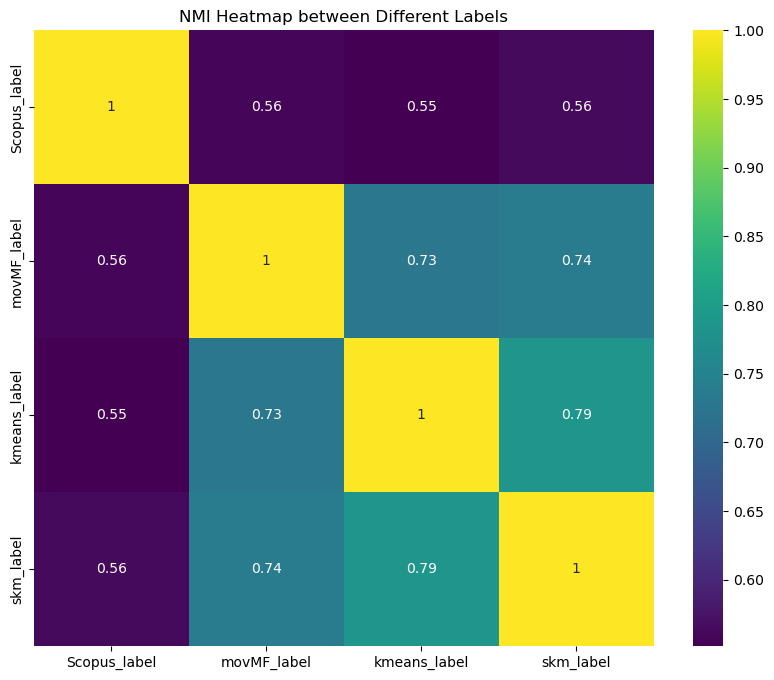

In [4]:
import seaborn as sns
from sklearn.metrics import normalized_mutual_info_score

import matplotlib.pyplot as plt

# Calculate NMI between each pair of labels
labels = ['Scopus_label', 'movMF_label', 'kmeans_label', 'skm_label']
nmi_matrix = pd.DataFrame(index=labels, columns=labels)

for label1 in labels:
    for label2 in labels:
        nmi_matrix.loc[label1, label2] = normalized_mutual_info_score(cluster_df[label1], cluster_df[label2])

# Convert the NMI matrix to float
nmi_matrix = nmi_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nmi_matrix, annot=True, cmap='viridis')
plt.title('NMI Heatmap between Different Labels')
plt.show()